# Import libraries

In [1]:
# Data analysis and wrangling
import pandas as pd
import numpy as np

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dates
import datetime
 
#remove warnings
import warnings
warnings.filterwarnings('ignore')

#  Load data

In [2]:
dataz = pd.read_excel('ANZ synthesised transaction dataset (1).xlsx')
dataz.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


# Checking the type of data

In [3]:
type(dataz)

pandas.core.frame.DataFrame

This dataset contains 3 months' worth of transactions for 100 customers which includes purchases, recurring transactions and salary transactions.

let's check for the information of the columns

In [4]:
dataz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

# Checking for the 100 unique customers

In [5]:

print('Number of unique accounts: ', dataz.account.nunique())
print("Number of unique transaction ID's: ", dataz.transaction_id.nunique())
print("Number of unique customer ID's: ", dataz.customer_id.nunique())

Number of unique accounts:  100
Number of unique transaction ID's:  12043
Number of unique customer ID's:  100


There are 100 unique customers

# The number of rows and columns

In [6]:
print('dataz shape: ', dataz.shape)

dataz shape:  (12043, 23)


In [7]:
print('Number of rows: ', len(dataz))

Number of rows:  12043


# Checking the date format

In [8]:
dataz.date.describe()

count                   12043
unique                     91
top       2018-09-28 00:00:00
freq                      174
first     2018-08-01 00:00:00
last      2018-10-31 00:00:00
Name: date, dtype: object

It can be seen that there is 3 months’ worth of transactions for 100 hypothetical customers from 2018-08-01 to 2018-10-31. But, there is one day missing because there are 91 unique days.  

# Checking the missing date

In [9]:
pd.date_range(start = '2018-08-01', end = '2018-10-31').difference(dataz.date)

DatetimeIndex(['2018-08-16'], dtype='datetime64[ns]', freq=None)

# Descriptive statistics of numerical variables

In [10]:
dataz.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


Normally, the describe function shows the outliers in the data by checking the maximum and the minimum.

# Missing figures 

In [11]:
misfig = dataz.isnull().sum()
misfig = misfig[misfig > 0]
misfig_percentage = round(misfig / len(dataz), 3) * 100
pd.DataFrame({"Number of misfig values": misfig, "Percentage": misfig_percentage}).sort_values(by = "Percentage", ascending = False)

,Number of misfig values,Percentage
bpay_biller_code,11158,92.7
merchant_code,11160,92.7
card_present_flag,4326,35.9
merchant_id,4326,35.9
merchant_suburb,4326,35.9
merchant_state,4326,35.9
merchant_long_lat,4326,35.9


bpay_biller_code and merchant_code have a high percentage of missing values and hence needs to be dropped. 

# Dropping the null values 

We need to drop 'bpay_biller_code'and 'merchant_code' because it has over 90%missing filled.

In [12]:
dataz.drop(columns=['bpay_biller_code', 'merchant_code'],inplace=True)

In [13]:
#dropping null values in merchant state
df = pd.DataFrame(dataz.merchant_state)
df1 = df.dropna()
df1.head()

,merchant_state
0,QLD
1,NSW
2,NSW
3,QLD
4,QLD


checking if the null figures are still there

In [14]:
misfis = df1.isnull().sum()
print(misfis)

merchant_state    0
dtype: int64


# Exploratory Data Analysis

Now let's check for the the Average transaction amount

In [17]:
import statistics

In [18]:
average_trans = statistics.mean(dataz.amount)
print('The average transactional amount is: ', round(average_trans, 2) )

The average transactional amount is:  187.93


# Average transaction volume by category

In [19]:
dataz.groupby('txn_description').amount.mean()

txn_description
INTER BANK      86.699461
PAY/SALARY    1898.728029
PAYMENT         77.613077
PHONE BANK     106.099010
POS             40.407412
SALES-POS       39.909789
Name: amount, dtype: float64

In [20]:
sns.set_style('darkgrid')

Text(0.5, 1.0, 'Average transaction volume by category')

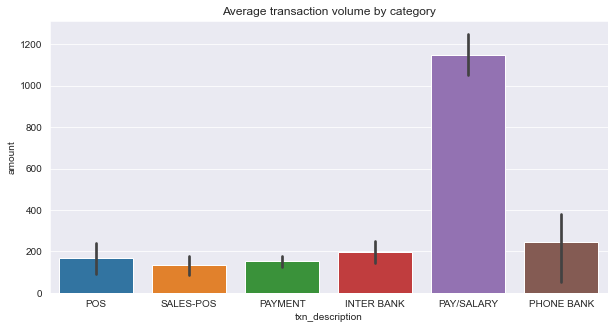

In [21]:
plt.figure(figsize = (10, 5))
sns.barplot(x= 'txn_description', y= 'amount', data = dataz, estimator=np.std)
plt.title('Average transaction volume by category')

Salary is the highest transaction and the gap is really huge.

Text(0.5, 1.0, 'Average transaction volume by category and movement')

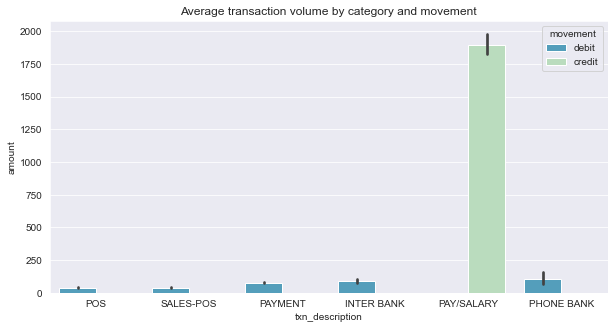

In [22]:
plt.figure(figsize = (10, 5))
sns.barplot(x= 'txn_description', y= 'amount', data = dataz, hue='movement',
            palette = 'GnBu_r')
plt.title('Average transaction volume by category and movement')

This shows that, salaries were paid with credit and all the others used debit throughout. With the great high confidence interval, it means the sample mean is far less reliable as an estimate of the true amount of the salary, Phone bank and Interbank. This means the average portrayed is false. 

# Descriptive statistics of transactions 

In [23]:
dataz.groupby('txn_description').amount.describe()

,count,mean,std,min,25%,50%,75%,max
txn_description,,,,,,,,
INTER BANK,742.0,86.699461,198.706044,16.0,26.000,39.000,83.000,1956.00
PAY/SALARY,883.0,1898.728029,1150.364621,576.0,1013.670,1626.480,2538.680,8835.98
PAYMENT,2600.0,77.613077,152.310315,15.0,32.000,42.500,70.000,1981.00
PHONE BANK,101.0,106.099010,245.999695,21.0,36.000,43.000,67.000,1916.00
POS,3783.0,40.407412,165.771678,0.1,12.035,19.430,33.155,7081.09
SALES-POS,3934.0,39.909789,132.734185,0.1,12.160,20.035,34.575,4233.00


There is a huge difference between the minimum and the maximum numbers. With the great high confidence interval, it means the sample mean is far less reliable as an estimate of the true amount of the salary, Phone bank and Interbank. This means the average portrayed is false. 

# Number of transaction by gender

Text(0.5, 1.0, 'Number of transaction by gender')

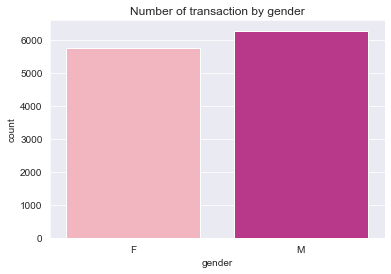

In [24]:
sns.countplot(x= 'gender', data = dataz, palette = 'RdPu')
plt.title('Number of transaction by gender')

# Average transaction by gender

Text(0.5, 1.0, 'Average transaction volume by gender')

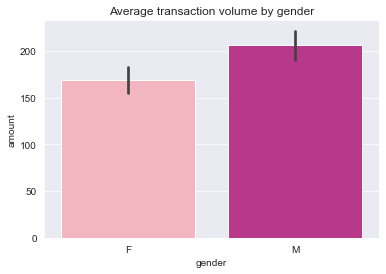

In [25]:
sns.barplot(x= 'gender', y= 'amount', data = dataz, palette = 'RdPu')
plt.title('Average transaction volume by gender')

Relatively, males had more transactions than females.

# Average transaction volume by state and movement

In [26]:
dataz.merchant_suburb.dropna().head()

0          Ashmore
1           Sydney
2           Sydney
3          Buderim
4    Mermaid Beach
Name: merchant_suburb, dtype: object

In [27]:
dataz.card_present_flag.dropna().isnull().sum()

0

Text(0.5, 1.0, 'Average transaction volume by state and movement')

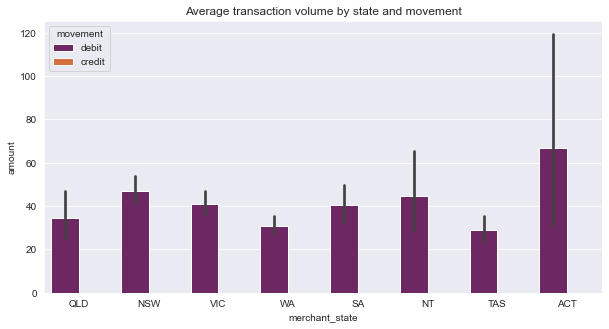

In [28]:
plt.figure(figsize = (10, 5))
sns.barplot(x= 'merchant_state', y= 'amount', data = dataz, hue='movement',
            palette = 'inferno')
plt.title('Average transaction volume by state and movement')

ACT has the highest average transaction volume but the variance is quite large.

Text(0.5, 1.0, 'Number transaction volume by state')

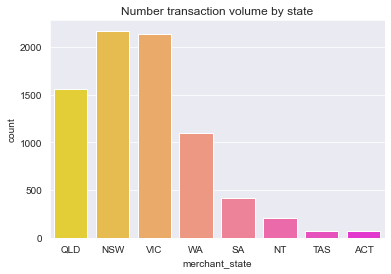

In [29]:
sns.countplot(x= 'merchant_state', data = dataz, palette = 'spring_r')
plt.title('Number transaction volume by state')

ACT's average transaction volume is the highest but it is the state with the lowest number of transaction. This means that, the company needs to focus on ACT since its average tranasaction is high.
  While the NSW and VIC have a high number of transactions, their average transactions volume is relatively low. Hence, little effort should be put there.

# Average transaction volume by movement

Text(0.5, 1.0, 'Average transaction volume by movement')

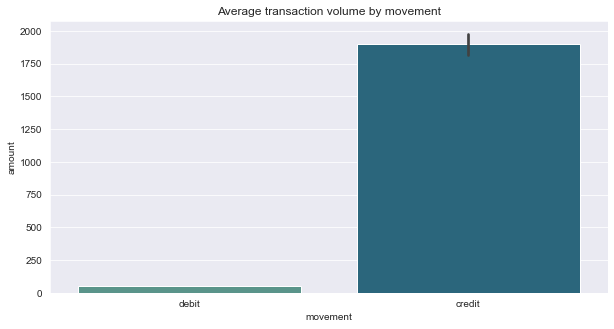

In [30]:
plt.figure(figsize = (10, 5))
sns.barplot(x= 'movement', y= 'amount', data = dataz, palette = 'crest')
plt.title('Average transaction volume by movement')

This shows that average transactions were made mostly on credit.

Text(0.5, 1.0, 'Number transaction volume by movement')

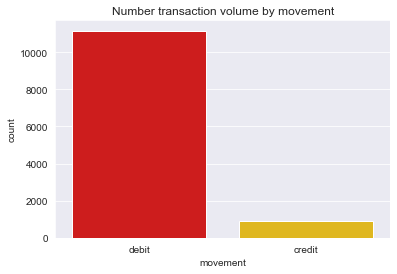

In [31]:
sns.countplot(x= 'movement', data = dataz, palette = 'hot')
plt.title('Number transaction volume by movement')

While most of the transactions were with debit cards.

# Checking for the value counts

In [32]:
dataz.date.value_counts().head()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
Name: date, dtype: int64

In [33]:
dataz.customer_id.value_counts().head()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
Name: customer_id, dtype: int64

# Age distribution

Text(0.5, 1.0, 'Age distribution')

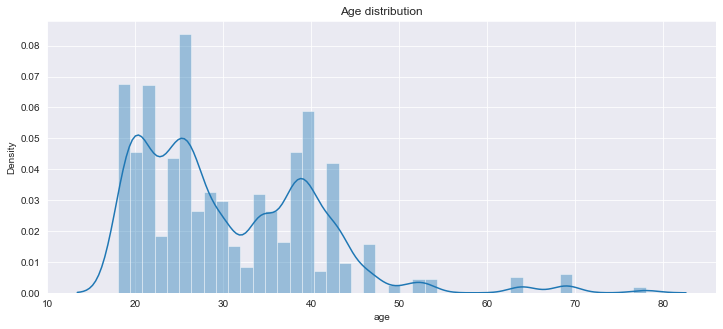

In [34]:
plt.figure(figsize = (12, 5))
sns.distplot(dataz.age)
plt.title("Age distribution")

Alot of transactions came from people in their 20's, while the lowest transactions came from people after 50 years.

# Transaction Volume

In [35]:
daily_amount = pd.DataFrame(dataz.groupby("date").amount.sum())
daily_amount.head()

,amount
date,
2018-08-01,29867.94
2018-08-02,21786.32
2018-08-03,38096.58
2018-08-04,6296.05
2018-08-05,4426.50


Text(0, 0.5, 'Daily Transaction volume')

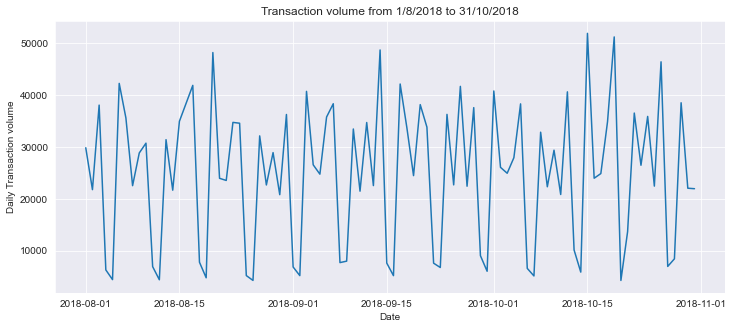

In [36]:
fig, ax = plt.subplots(figsize = (12, 5))
ax.plot(daily_amount.index, daily_amount.amount)
plt.title("Transaction volume from 1/8/2018 to 31/10/2018")
plt.xlabel("Date")
plt.ylabel("Daily Transaction volume")

There exist some pattern over the 3 months.

# Balance Distribution

Text(0.5, 1.0, 'Balance distribution')

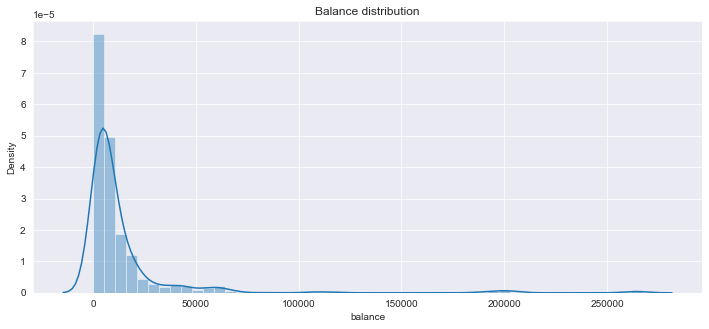

In [37]:
plt.figure(figsize = (12, 5))
sns.distplot(dataz.balance)
plt.title("Balance distribution")

<AxesSubplot:xlabel='balance'>

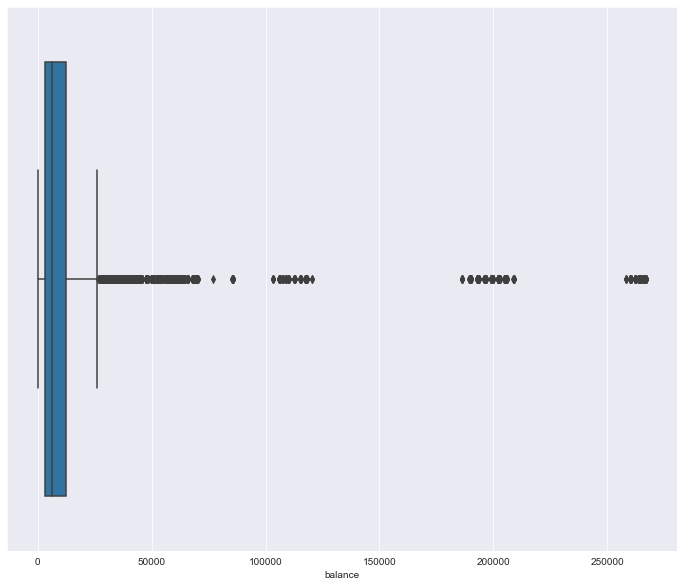

In [38]:
plt.figure(figsize = (12, 10))
sns.boxplot(dataz.balance)

The balance session is rightly skewed, hence, needs to be corrected before the model.

# Customer monthly volume

In [39]:
customer_monthly_volume = pd.DataFrame(dataz.groupby('customer_id').amount.sum()/3)
customer_monthly_volume.head()

,amount
customer_id,
CUS-1005756958,5422.990000
CUS-1117979751,11328.123333
CUS-1140341822,5670.200000
CUS-1147642491,9660.273333
CUS-1196156254,12016.906667


In [40]:
pd.DataFrame(dataz.groupby('customer_id').amount.sum())

,amount
customer_id,
CUS-1005756958,16268.97
CUS-1117979751,33984.37
CUS-1140341822,17010.60
CUS-1147642491,28980.82
CUS-1196156254,36050.72
...,...
CUS-72755508,11438.37
CUS-809013380,18810.09
CUS-860700529,18099.88


plt.figure(figsize = (10, 5))
sns.distplot(customer_monthly_volume.amount)
plt.title("Customers' monthly transaction volume")

<AxesSubplot:xlabel='amount'>

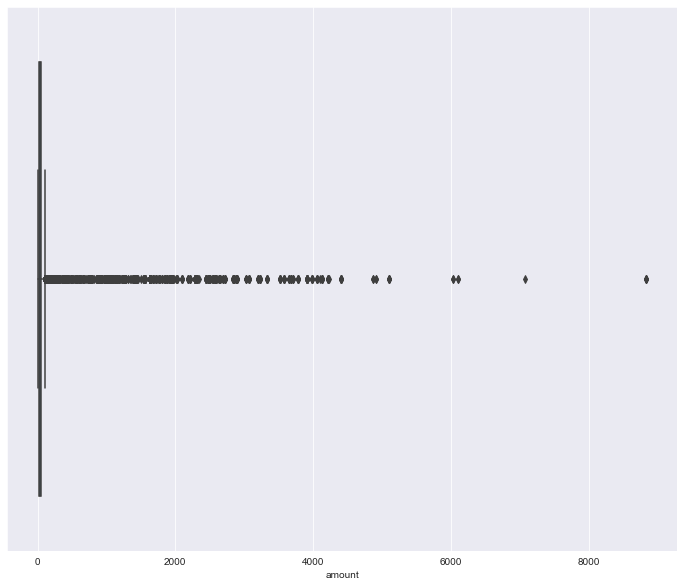

In [41]:
plt.figure(figsize = (12, 10))
sns.boxplot(dataz.amount)

The amount session is also rightly skewed and hence has to be transformed before the model.

# Correlation

In [42]:
dataz.corr()

,card_present_flag,balance,age,amount
card_present_flag,1.000000,0.005925,-0.008405,-0.002074
balance,0.005925,1.000000,0.199329,0.059178
age,-0.008405,0.199329,1.000000,0.029980
amount,-0.002074,0.059178,0.029980,1.000000


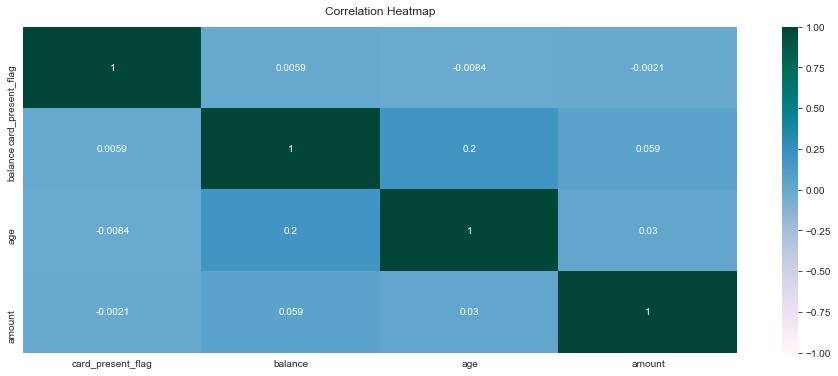

In [43]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dataz.corr(), vmin=-1, vmax=1, annot=True, cmap='PuBuGn')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

There is very minimal correlation in the data, Hence looks good.We do not need to drop any column.

# Saving the data

In [44]:
dataz.to_excel('anz.xlsx')